In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
years = [str(y) for y in range(2001,2018)]
columns = ["Area code", "Area name"] + years
growth_boroughs = ['Greenwich', 'Hackney', 'Newham', 'Tower Hamlets', 'Barking and Dagenham', 'Waltham Forest']

In [ ]:
def plot_boroughs(data):
    plt.xticks(np.arange(0,18),years, rotation=90)
    for borough in growth_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]

        plt.plot(borough_by_year, label=borough)
    plt.legend()
    plt.show()

# Number of restaurants by borough


In [4]:
restaurants_units = pd.read_excel("../data/restaurants-cafes-borough.xls", sheet_name="Restaurants units", skiprows=4, names=columns)
restaurants_units_boroughs = restaurants_units[restaurants_units['Area name'].isin(growth_boroughs)]

restaurants_units_boroughs

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,30.0,30.0,30.0,35.0,35.0,35.0,35.0,35.0,30.0,30.0,30.0,40.0,40.0,35.0,45.0,40.0,35.0
11,E09000011,Greenwich,70.0,75.0,65.0,75.0,70.0,75.0,90.0,95.0,90.0,100.0,100.0,120.0,125.0,120.0,125.0,140.0,145.0
12,E09000012,Hackney,95.0,100.0,100.0,110.0,110.0,120.0,120.0,130.0,120.0,125.0,140.0,160.0,165.0,180.0,230.0,245.0,285.0
25,E09000025,Newham,45.0,55.0,50.0,60.0,75.0,85.0,85.0,80.0,75.0,80.0,75.0,95.0,110.0,110.0,120.0,120.0,125.0
30,E09000030,Tower Hamlets,135.0,160.0,165.0,175.0,175.0,180.0,200.0,195.0,210.0,215.0,215.0,245.0,260.0,285.0,300.0,320.0,320.0
31,E09000031,Waltham Forest,75.0,70.0,65.0,65.0,85.0,80.0,85.0,80.0,65.0,75.0,80.0,95.0,95.0,95.0,115.0,125.0,135.0


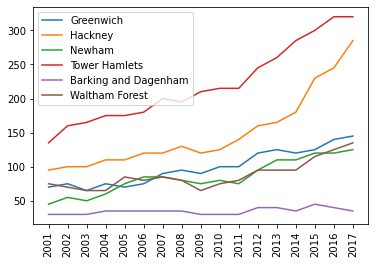

In [5]:
plot_boroughs(restaurants_units_boroughs)

# Number of restaurant employees by borough

In [6]:
restaurants_employees = pd.read_excel("../data/restaurants-cafes-borough.xls", sheet_name="Restaurants employment", skiprows=4, names=columns)
restaurants_employees_boroughs = restaurants_employees[restaurants_employees['Area name'].isin(growth_boroughs)]

restaurants_employees_boroughs

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,200.0,300.0,300.0,300.0,300.0,300.0,300.0,400.0,300.0
11,E09000011,Greenwich,700.0,700.0,600.0,700.0,800.0,700.0,800.0,700.0,800.0,1000.0,1200.0,1500.0,1700.0,1500.0,1700.0,1900.0,2000.0
12,E09000012,Hackney,600.0,600.0,800.0,900.0,900.0,1000.0,900.0,1100.0,1200.0,1400.0,1800.0,2100.0,2300.0,2700.0,3700.0,4000.0,4700.0
25,E09000025,Newham,400.0,500.0,500.0,600.0,500.0,700.0,700.0,700.0,700.0,900.0,900.0,1100.0,1600.0,2200.0,2300.0,2400.0,2300.0
30,E09000030,Tower Hamlets,1300.0,1800.0,1900.0,1600.0,1700.0,1900.0,1900.0,1900.0,2200.0,2400.0,2800.0,3100.0,3300.0,4000.0,4600.0,5000.0,5200.0
31,E09000031,Waltham Forest,500.0,500.0,500.0,400.0,500.0,400.0,500.0,500.0,400.0,500.0,600.0,600.0,600.0,600.0,700.0,900.0,1100.0


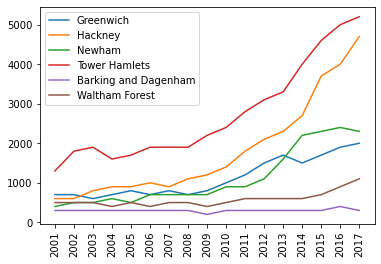

In [14]:
plot_boroughs(restaurants_employees_boroughs)

# Try to plot all boroughs

In [16]:
def plot_all_boroughs(data):
    plt.xticks(np.arange(0,18),years, rotation=90)
    
    all_boroughs = data['Area name']
    
    for borough in all_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]

        plt.plot(borough_by_year, label=borough)
    plt.legend()
    plt.show()
    

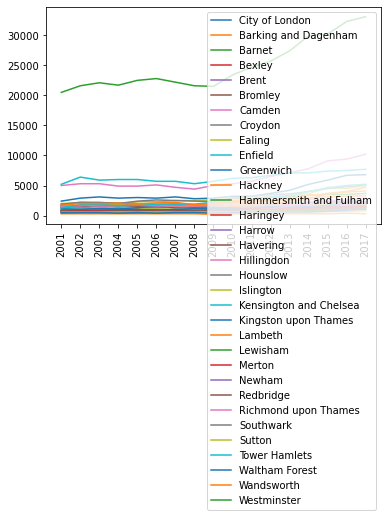

In [13]:
restaurants_employees = restaurants_employees[restaurants_employees['Area name']  != 'London']
plot_all_boroughs(restaurants_employees)